
--------------------------------------
**notebooks/Model_Evaluation.ipynb**
```markdown
# Model_Evaluation.ipynb

В этом ноутбуке мы:
1. Загрузим сохраненные модели (IsolationForest, RandomForest, Autoencoder).
2. Рассчитаем метрики на тестовых данных.
3. Построим ROC-кривые, PR-кривые.
4. Сравним результаты моделей друг с другом.

Isolation Forest metrics: {'precision': np.float64(0.0), 'recall': np.float64(0.0), 'f1': np.float64(0.0), 'roc_auc': np.float64(0.6826796367880535)}


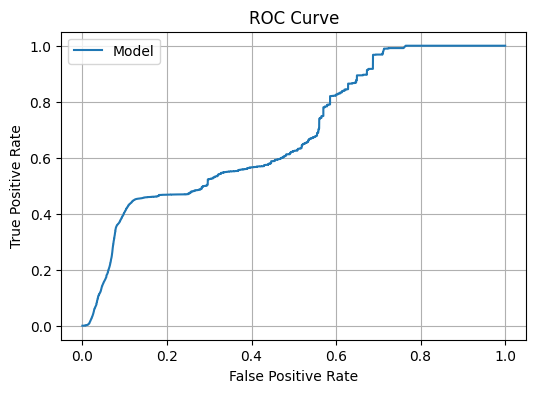

Random Forest metrics: {'precision': np.float64(0.9971094287680661), 'recall': np.float64(0.9978738313558967), 'f1': np.float64(0.9974914836168136), 'roc_auc': np.float64(0.9999214276325252)}


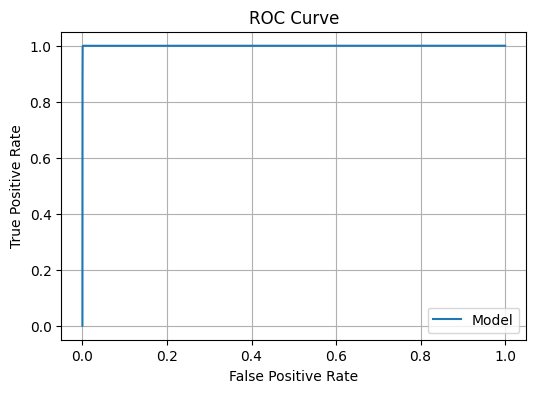

In [4]:
import pandas as pd
import joblib

import sys
sys.path.append("..")

from evaluation.metrics import MetricsEvaluator
from evaluation.visualization import Visualization

# Загрузка тестовых данных
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Загрузка IsolationForest
iso = joblib.load("../models/isolation_forest_model.pkl")
iso_scores = iso.decision_function(X_test) * -1
iso_metrics = MetricsEvaluator.evaluate(y_test, iso_scores)
print("Isolation Forest metrics:", iso_metrics)

Visualization.plot_roc(y_test, iso_scores)

# Загрузка RandomForest
rf = joblib.load("../models/random_forest_model.pkl")
rf_scores = rf.predict_proba(X_test)[:, 1]
rf_metrics = MetricsEvaluator.evaluate(y_test, rf_scores)
print("Random Forest metrics:", rf_metrics)

Visualization.plot_roc(y_test, rf_scores)